In [1]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
TEMPERATURES = [1]
SIMULATIONS = [100]
TRIAL = 1

env1 = StatelessGym.make('Acrobot-v1')
#env2 = StatelessGym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

agent = MCTS.mcts_agent(horizon=-1)

experiment1 = Experiment(env1, agent, temperatures=TEMPERATURES, simulations=SIMULATIONS, trial=TRIAL, experiment_name="FrozenLake Base MCTS")

Simulation =  100 	Mean Cumulative Reward =  -378.0 	Error =  0.0
Temperature =  1  Results =  [-378.0]


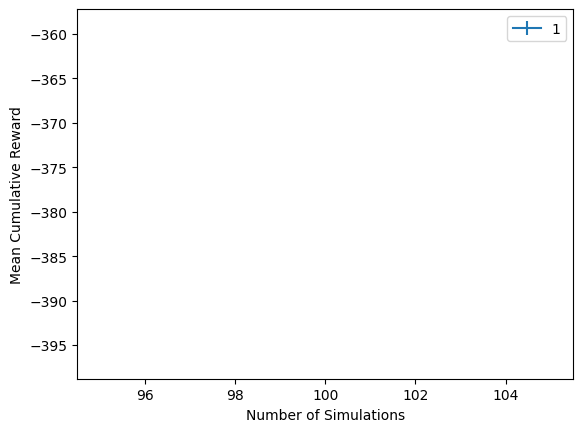

In [20]:
experiment1.run(save=False)
experiment1.show_results()

In [1]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os

env = StatelessGym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
agent = MCTS.mcts_agent(horizon=-1)

rand_experiment = RandomExperiment(env, agent, simulations=[1, 16], temperature=1)
result = rand_experiment.run()
print(result)

ds = rand_experiment.create_dataset(10, "test_with_features")
print(ds)

[1, 15, 0.0, 0.0]
test_with_features: 1/10
test_with_features: 2/10
test_with_features: 3/10
test_with_features: 4/10
test_with_features: 5/10
test_with_features: 6/10
test_with_features: 7/10
test_with_features: 8/10
test_with_features: 9/10
test_with_features: 10/10
[]


    Temperature  Simulations  Return
0             1            8   308.0
1             1            1     9.0
2             1            2   222.0
3             1           15   324.0
4             1            8   173.0
..          ...          ...     ...
95            1           14   466.0
96            1           15   251.0
97            1           15   271.0
98            1            4   158.0
99            1            1     9.0

[100 rows x 3 columns]
Simulations
1       9.583333
2     262.750000
3     275.666667
4     268.833333
5     322.875000
6     324.666667
7     381.142857
8     364.333333
9     300.500000
10    406.200000
11    271.000000
12    364.400000
13    361.000000
14    440.500000
15    287.400000
16    388.000000
Name: Return, dtype: float64
<PandasArray>
[0.5149286505444373,  96.94457179233915, 105.12056570116683,
  120.3319021152191,   156.776854614631, 142.17547842953323,
 114.61155929403249, 155.16786608917025, 105.97310979677816,
  102.4779651112049, 1

<ErrorbarContainer object of 3 artists>

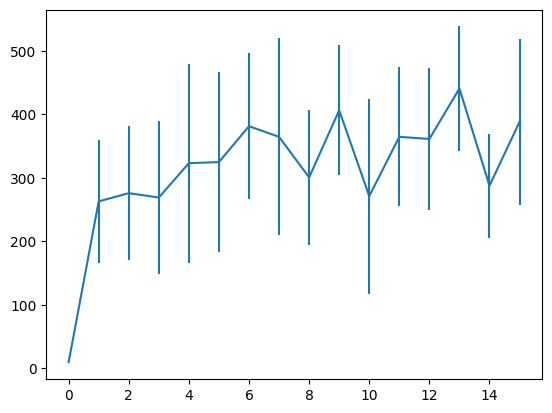

In [61]:
df = pd.read_csv('../datasets/1-100_dataset.csv')
print(df)

group_simulation = df.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

plt.errorbar(list(range(len(group_simulation))),  mean_returns, yerr=std_returns.array)

In [16]:
dataset_name = "Cluster_%d_1-16_1000-t500-Cartpole.csv"
dataset = pd.DataFrame()

for i in range(1, 11):
    dataset = dataset.append(pd.read_csv('../datasets/' + dataset_name % i), ignore_index=True)
    
print(dataset)

      Temperature  Simulations  Return
0             500            5   223.0
1             500           13   500.0
2             500           12   423.0
3             500            3    68.0
4             500            8   162.0
...           ...          ...     ...
9995          500           13   500.0
9996          500           12   500.0
9997          500           14   210.0
9998          500            5   500.0
9999          500            6   348.0

[10000 rows x 3 columns]


In [2]:
directory = "../datasets/after_bug/s1-100-t1-FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()
print (dataset_names)

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
print(dataset)

['Cluster_10_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_10_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_1_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_1_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_2_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_2_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_3_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_3_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_4_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_4_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_5_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_5_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_6_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_6_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_7_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_7_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_8_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_8_100_s1_100-t1-FrozenLake-v1.csv', 'Cluster_9_1000_s1_100-t1-FrozenLake-v1.csv', 'Cluster_9_100_s1_100-t1-FrozenLake-v1.csv']
       Temperature  Simulations  Return  Discounted Return
0                1          

       Temperature  Simulations  Return  Discounted Return
0                1           45     1.0           0.911066
1                1           21     1.0           0.941680
2                1            6     1.0           0.747189
3                1           48     1.0           0.820126
4                1           50     1.0           0.953065
...            ...          ...     ...                ...
10995            1           58     1.0           0.947355
10996            1           10     1.0           0.894789
10997            1           73     1.0           0.976250
10998            1           34     1.0           0.922081
10999            1           43     1.0           0.967491

[11000 rows x 4 columns]


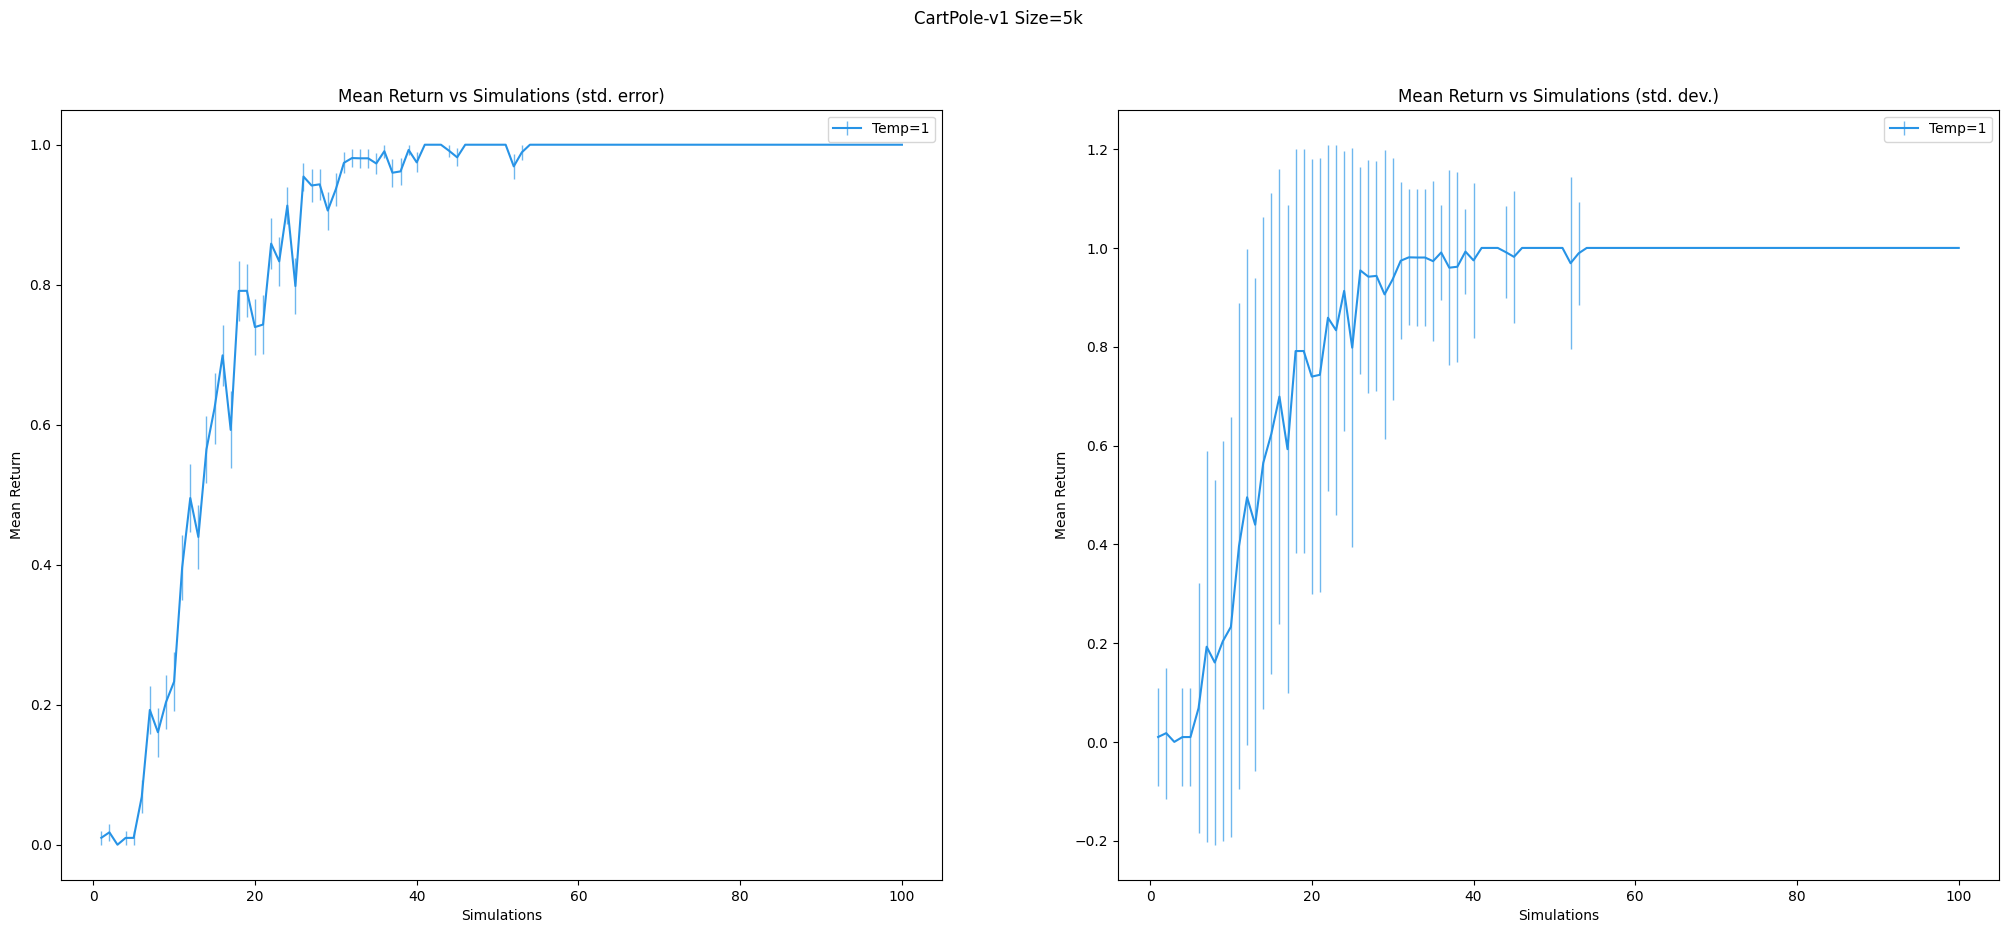

In [3]:
directory = "../datasets/after_bug/s1-100-t1-FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
print(dataset)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)


#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)
#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('CartPole-v1 Size=5k')
fig.set_size_inches(25, 10)

ax1.set_title("Mean Return vs Simulations (std. error)")
ax2.set_title("Mean Return vs Simulations (std. dev.)")
ax1.xaxis.set_label_text("Simulations")
ax1.yaxis.set_label_text("Mean Return")
ax2.xaxis.set_label_text("Simulations")
ax2.yaxis.set_label_text("Mean Return")

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

directory = "../datasets/100k_s1-100_t1_FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_discounted_returns = group_simulation["Discounted Return"].mean()
std_discounted_returns = group_simulation["Discounted Return"].std()
error_discounted_returns = std_returns / (group_simulation["Discounted Return"].count() ** 0.5)

#ax1.errorbar(list(group_simulation.indices.keys()),  mean_discounted_returns, yerr=error_discounted_returns.array, color="#e68327aa", ecolor="#e68327aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
#ax2.errorbar(list(group_simulation.indices.keys()),  mean_discounted_returns, yerr=std_discounted_returns.array, color="#e68327aa", ecolor="#e68327aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

ax1.legend()
ax2.legend()

In [41]:
directory = "../datasets/1000_s1-100_t1_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

d:\TU Delft\YEAR 2\MCTS_Time_Management\.conda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


# Histogram for a specific simulation number

In [26]:
directory = "../datasets/after_bug/states_s1-100_t500_Cartpole-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

In [27]:
dataset.describe()

,Temperature,Cart Position,Cart Velocity,Pole Angle,Pole Angular Velocity,Simulations,Return,Discounted Return
count,11000.0,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,500.0,-0.000042,-0.000344,-0.000235,0.000131,50.255909,457.010545,244.974474
std,0.0,0.028765,0.028949,0.028791,0.028625,28.830776,88.862099,34.854333
min,500.0,-0.049983,-0.049997,-0.049977,-0.049998,1.000000,9.000000,8.892753
25%,500.0,-0.024933,-0.025971,-0.025169,-0.024668,25.000000,460.000000,249.647573
50%,500.0,-0.000453,-0.000124,-0.000183,0.000242,50.000000,500.000000,259.124107
75%,500.0,0.024595,0.024803,0.024254,0.024639,75.000000,500.000000,259.124107
max,500.0,0.049997,0.049999,0.049998,0.049998,100.000000,500.000000,259.124107


In [33]:
#sim10
pole_angle = dataset[dataset["Simulations"] == 10]["Pole Angular Velocity"]

plt.scatter(pole_angle, dataset[dataset["Simulations"] == 10]["Return"], s=1, color="#2793e6", label="Temp=%d" % dataset["Temperature"].iloc[0])

KeyError: ('Pole Angular Velocity', 'Pole Angle')

count    100.00000
mean     227.90000
std       95.53618
min       11.00000
25%      171.75000
50%      222.50000
75%      291.50000
max      500.00000
Name: Return, dtype: float64
count     97.000000
mean     333.793814
std      122.783510
min      142.000000
25%      216.000000
50%      324.000000
75%      451.000000
max      500.000000
Name: Return, dtype: float64
count    109.000000
mean     349.926606
std      119.783501
min      152.000000
25%      234.000000
50%      349.000000
75%      489.000000
max      500.000000
Name: Return, dtype: float64
count    101.000000
mean     367.831683
std      116.191916
min      171.000000
25%      260.000000
50%      367.000000
75%      500.000000
max      500.000000
Name: Return, dtype: float64
count    119.000000
mean     385.630252
std      110.480450
min      173.000000
25%      279.500000
50%      393.000000
75%      500.000000
max      500.000000
Name: Return, dtype: float64
count     95.000000
mean     370.052632
std      117.415462
min

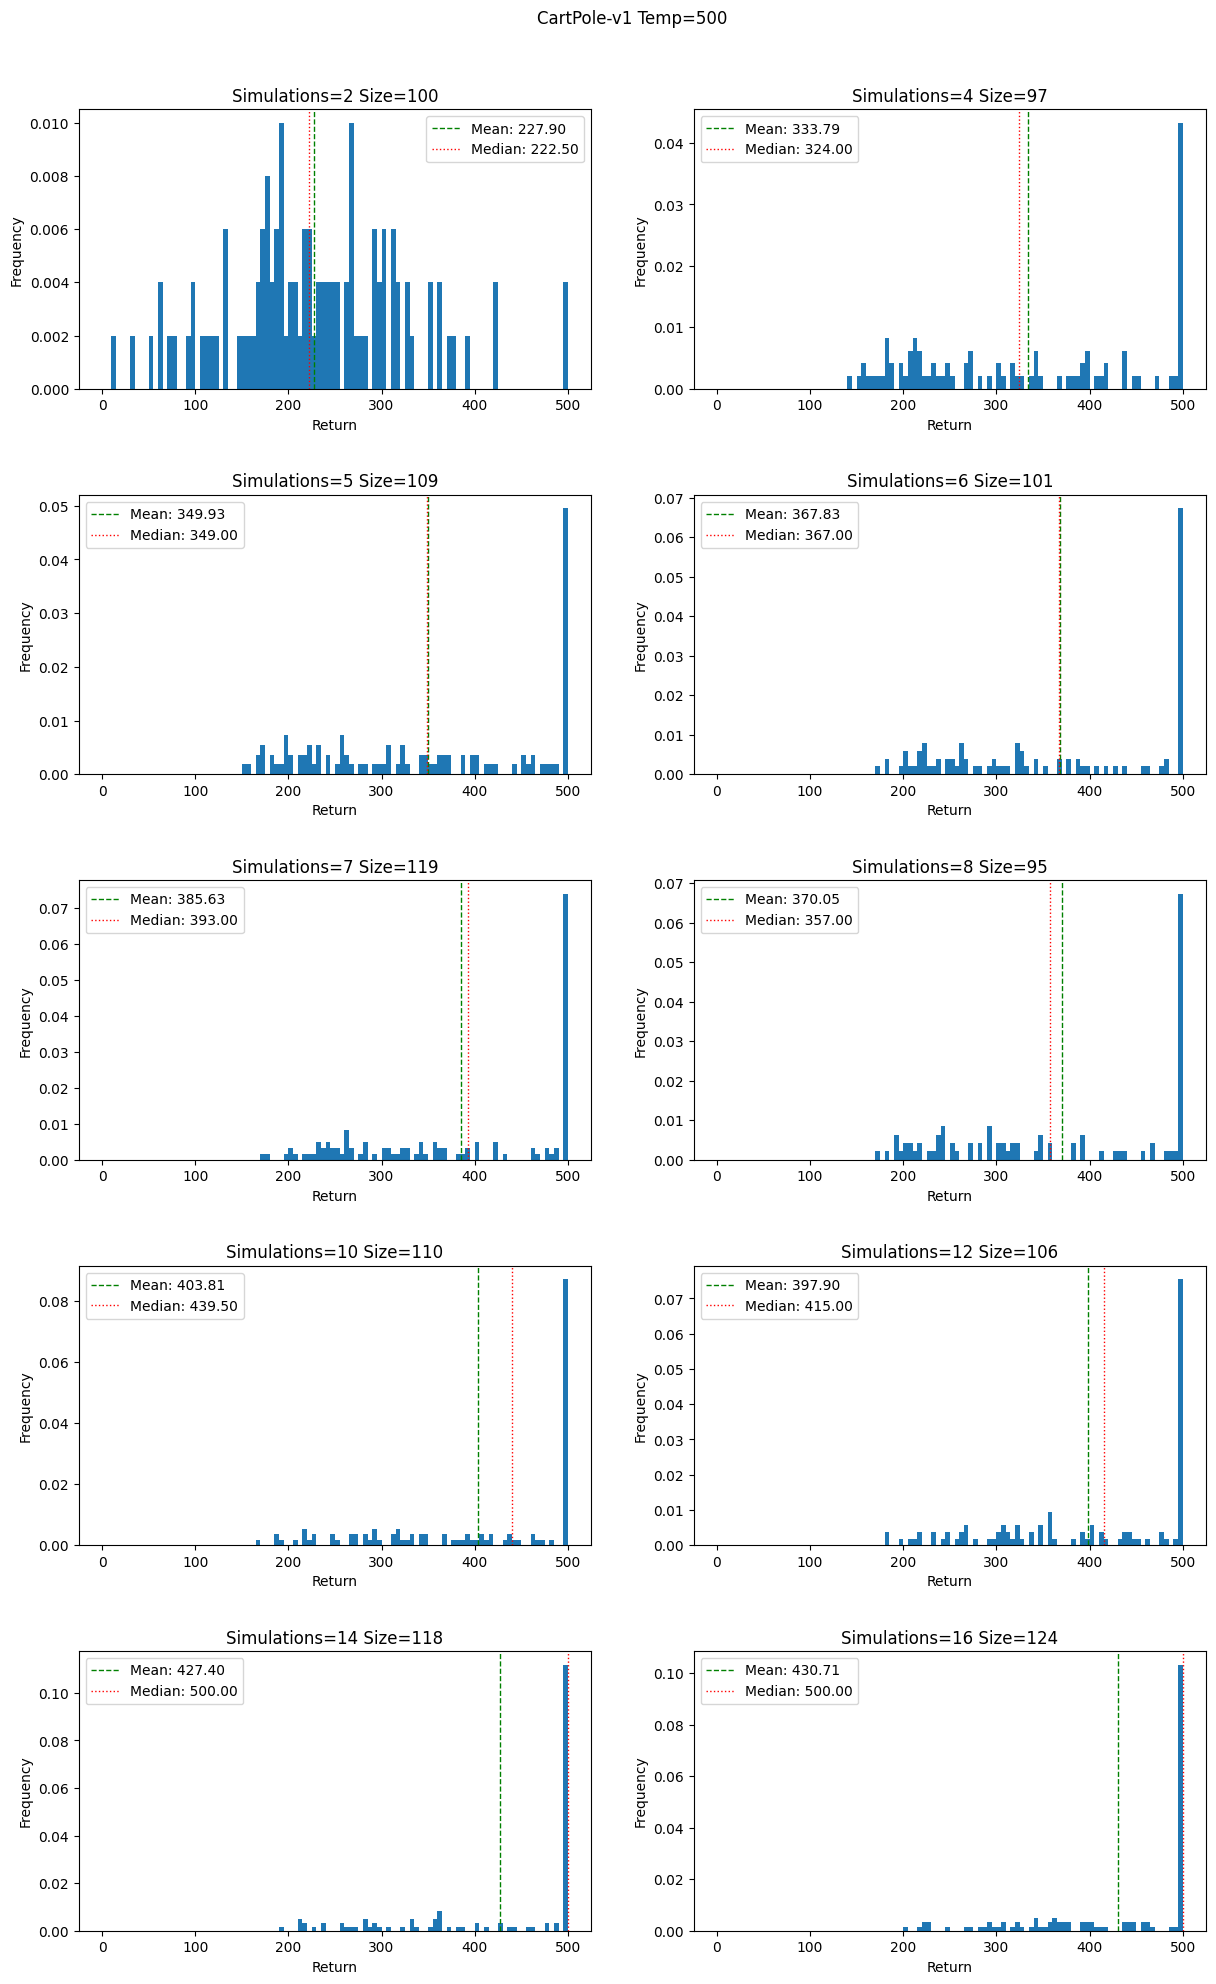

In [29]:
sims = [2, 4, 5, 6, 7, 8, 10, 12, 14, 16]
bins = 100
fig, axes = plt.subplots(len(sims) // 2 + len(sims) % 2, 2)
fig.suptitle('CartPole-v1 Temp=500')
fig.set_size_inches(12, 4 * (len(sims) // 2))
fig.tight_layout()
fig.subplots_adjust(wspace=0.2,
                    hspace=0.38,
                    top=0.93)

for i in range(len(sims)):
    print(group_simulation["Return"].get_group(sims[i]).describe())
    current_ax = axes[i // 2][i % 2]
    return_group = group_simulation["Return"].get_group(sims[i])
    current_ax.hist(return_group, bins=bins, density=True, range=[0, 500])
    current_ax.axvline(return_group.mean(), color="green", linestyle='dashed', linewidth=1, label = "Mean: %.2f" % return_group.mean())
    current_ax.axvline(return_group.median(), color="red", linestyle='dotted', linewidth=1, label = "Median: %.2f" % return_group.median())
    
    current_ax.set_title("Simulations=%d Size=%d" % (sims[i], len(return_group)))
    current_ax.xaxis.set_label_text("Return")
    current_ax.yaxis.set_label_text("Frequency")
    current_ax.legend()


In [66]:
print(list(group_simulation.indices.keys()))
print(mean_returns)
print(group_simulation["Return"].count())
print(error_returns.array)

[2, 5, 6, 8, 9, 10, 11, 13, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 45, 46, 49, 52, 54, 55, 56, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 84, 86, 93, 98, 99]
Simulations
2     156.500000
5     229.500000
6     500.000000
8     248.000000
9     319.250000
10    280.500000
11    285.000000
13    426.000000
15    390.000000
18    500.000000
19    245.000000
22    171.000000
23    352.000000
24    253.000000
25    352.666667
26    500.000000
27    500.000000
28    339.000000
29    364.000000
30    500.000000
31    500.000000
32    392.500000
33    288.000000
36    261.000000
37    500.000000
38    327.000000
39    376.333333
40    421.000000
41    349.000000
43    243.000000
45    227.000000
46    305.000000
49    308.000000
52    329.000000
54    500.000000
55    410.666667
56    410.250000
61    425.000000
62    500.000000
63    460.000000
65    500.000000
68    495.500000
69    500.000000
70    448.000000
71    50

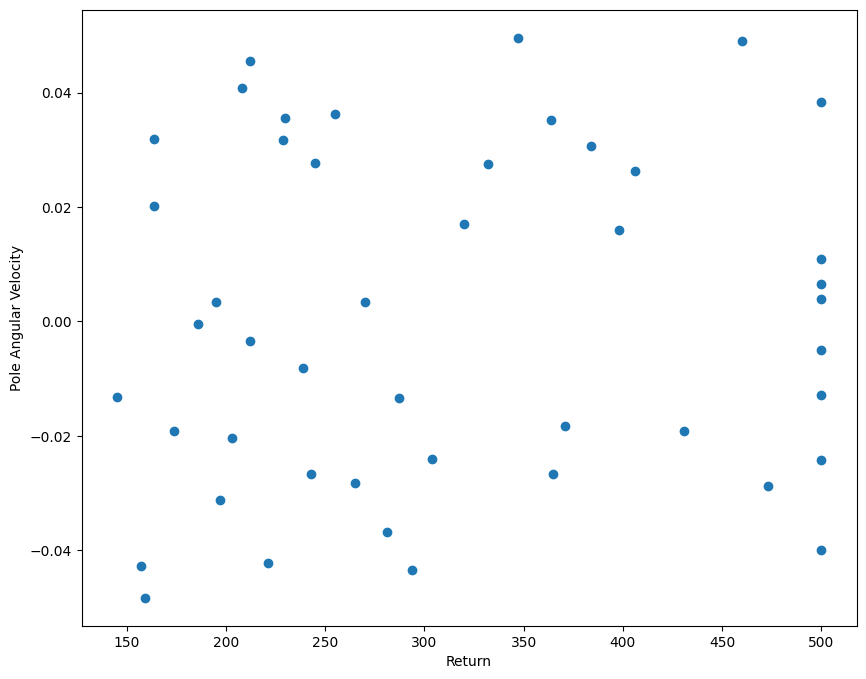

In [59]:
# Filter the data where simulations=8
filtered_data = dataset[dataset['Simulations'] == 8]

# Extract the required columns
pole_angle = filtered_data['Pole Angle']
pole_angular_velocity = filtered_data['Pole Angular Velocity']
return_value = filtered_data['Return']

# Create the 3D scatter plot
plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111, projection='3d')

# Plot the data
plt.scatter(return_value, pole_angular_velocity)

# Set labels for the axes
plt.xlabel('Return')
plt.ylabel('Pole Angular Velocity')


# Show the plot
plt.show()

# Regression Algorithms

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import median_absolute_error, mean_squared_log_error, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance

In [5]:
directory = "../datasets/after_bug/s1-100-t1-FrozenLake-v1/"
#directory = "../datasets/10k/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

In [6]:
print(dataset)

       Temperature  Simulations  Return  Discounted Return
0                1           45     1.0           0.911066
1                1           21     1.0           0.941680
2                1            6     1.0           0.747189
3                1           48     1.0           0.820126
4                1           50     1.0           0.953065
...            ...          ...     ...                ...
10995            1           58     1.0           0.947355
10996            1           10     1.0           0.894789
10997            1           73     1.0           0.976250
10998            1           34     1.0           0.922081
10999            1           43     1.0           0.967491

[11000 rows x 4 columns]


In [22]:
#features = ['Simulations', 'Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Angular Velocity']
features = ['Simulations']

X = dataset[features].values.reshape(-1, len(features))
y = dataset['Discounted Return'].values

# for row in X:
#     row[1] = row[3] * row[4]

from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data (compute the mean and standard deviation)
scaler.fit(X)

# Transform your data by applying the scaler
#X = scaler.transform(X)

StandardScaler()

In [23]:
print(X)
print(y.shape)

[[45]
 [21]
 [ 6]
 ...
 [73]
 [34]
 [43]]
(11000,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
models = {
    'LinearRegression': LinearRegression(),
    # #'Ridge': Ridge(alpha=1.0),
    # #'Lasso': Lasso(alpha=1.0),
    # #'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    #'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    #'MLPRegressor': MLPRegressor(hidden_layer_sizes=(32, 32), max_iter=500)
}


predictions = {}  # Dictionary to store predictions

# Example usage: training and predicting with each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    
    # Perform further operations with the predictions

In [26]:
metrics = {
    'Mean Squared Error': mean_squared_error,
    #'Mean Absolute Error': mean_absolute_error,
    'R^2 Score': r2_score,
    #'Explained Variance Score': explained_variance_score,
    #'Median Absolute Error': median_absolute_error,
    #'Mean Squared Log Error': mean_squared_log_error,
    #'Max Error': max_error,
    #'Mean Poisson Deviance': mean_poisson_deviance,
    #'Mean Gamma Deviance': mean_gamma_deviance,
    #'Mean Tweedie Deviance': mean_tweedie_deviance
}

# Example usage: iterating over the predictions dictionary and calculating metrics

for model_name, y_pred in predictions.items():
    print(f"Model: {model_name}")
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f"{metric_name}: {metric_value}")
    print()


Model: LinearRegression
Mean Squared Error: 0.06463782992136967
R^2 Score: 0.40970047406619226

Model: SVR
Mean Squared Error: 0.03445793230273527
R^2 Score: 0.6853158417027987

Model: DecisionTreeRegressor
Mean Squared Error: 0.03223485011834737
R^2 Score: 0.7056179521101629

Model: RandomForestRegressor
Mean Squared Error: 0.032256645610034974
R^2 Score: 0.7054189066219969

Model: GradientBoostingRegressor
Mean Squared Error: 0.03223385797661622
R^2 Score: 0.7056270127607798



## Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grids = {
    # 'LinearRegression': {
    #     'fit_intercept': [True, False],
    #     'normalize': [True, False]
    # },
    # 'SVR': {
    #     'kernel': ['linear', 'rbf'],
    #     'C': [0.1, 1, 10]
    # },
    # 'DecisionTreeRegressor': {
    #     'max_depth': [None, 5, 10],
    #     'min_samples_split': [2, 5, 10]
    # },
    # 'RandomForestRegressor': {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [None, 5, 10],
    #     'min_samples_split': [2, 5, 10]
    # },
    'GradientBoostingRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 10]
    },
}

for model_name, model in models.items():
    print(f"Performing grid search for {model_name}")
    param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params}")
    
    best_model = grid_search.best_estimator_
    scores = cross_val_score(best_model, X, y, cv=5)
    print(f"Cross-validation scores for {model_name}: {scores}")
    print("---")


Performing grid search for GradientBoostingRegressor
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Cross-validation scores for GradientBoostingRegressor: [0.53894295 0.47529915 0.52192105 0.47688389 0.51027753]
---


## Learning Curve

In [27]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(models['GradientBoostingRegressor'], X, y, cv=10, train_sizes=np.append(np.linspace(0.01, 0.1, 5, endpoint=False), np.linspace(0.1, 1.0, 10)), scoring='r2')

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

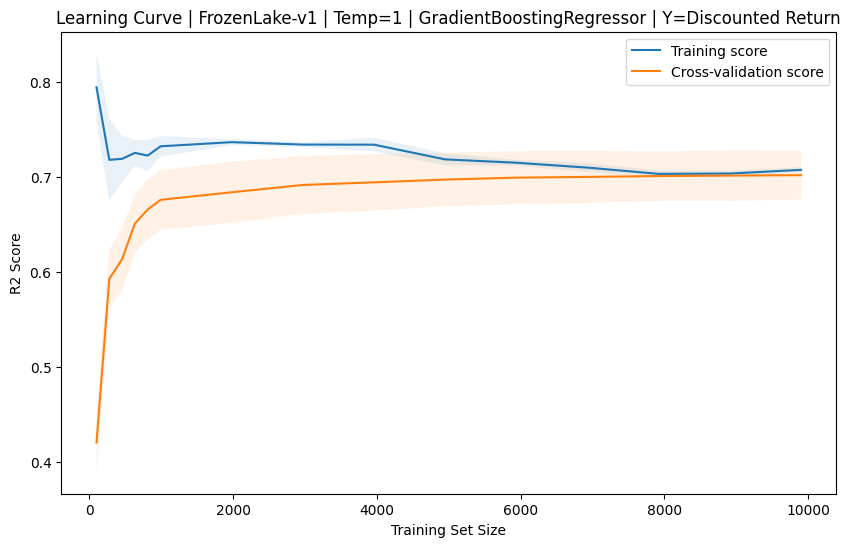

In [28]:
import matplotlib.ticker as ticker

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)


# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curve | FrozenLake-v1 | Temp=1 | GradientBoostingRegressor | Y=Discounted Return')
plt.legend(loc='best')
plt.show()

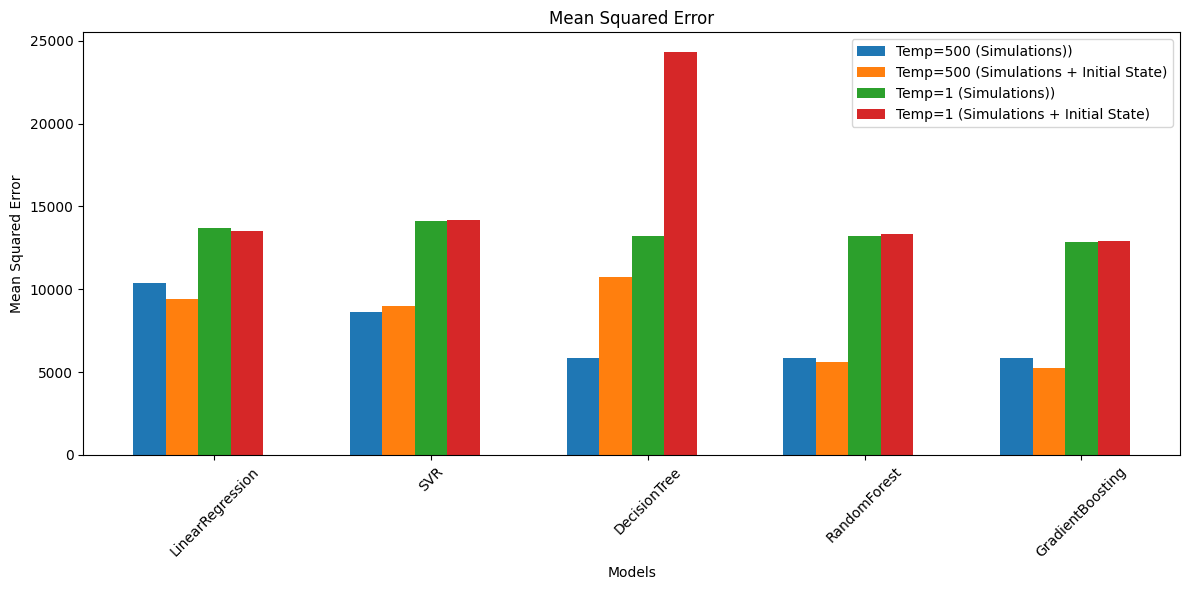

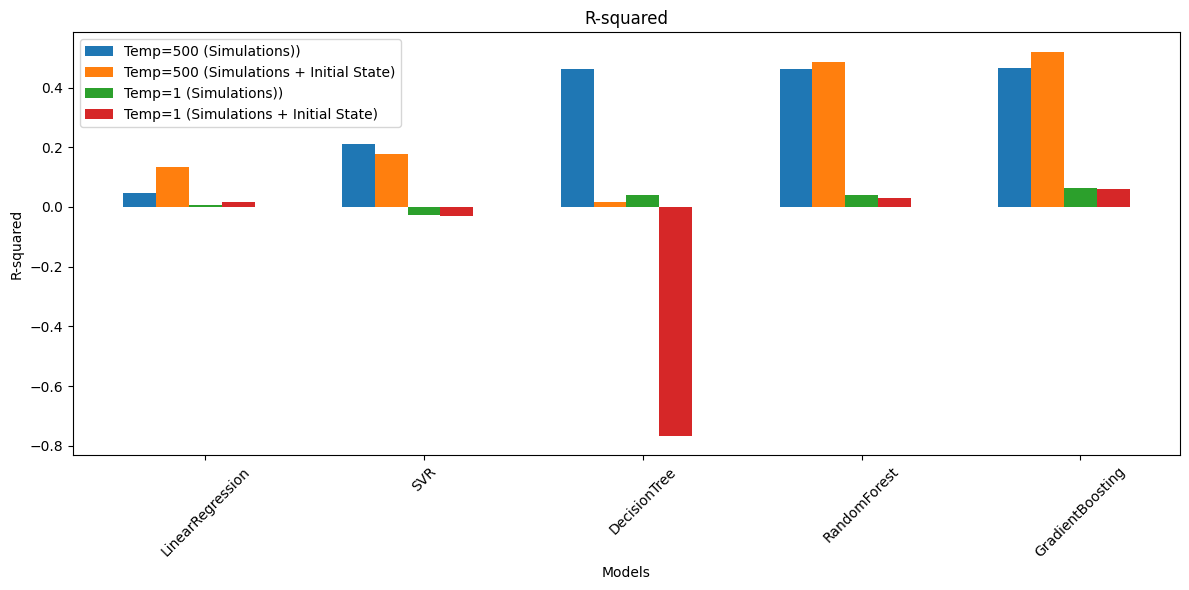

In [91]:
# MSE values for Simulations feature
mse_simulations = [10398.547, 8607.279, 5845.776, 5853.013, 5839.196]
# R-squared values for Simulations feature
r2_simulations = [0.0454, 0.2098, 0.4633, 0.4627, 0.4639]

# MSE values for multiple features
mse_multiple = [9432.686, 8975.262, 10722.759, 5587.510, 5222.649]
# R-squared values for multiple features
r2_multiple = [0.1340, 0.1760, 0.0156, 0.4870, 0.5205]

# MSE values for Simulations feature (second dataset)
mse_simulations2 = [13670.563, 14105.939, 13220.481, 13202.698, 12878.918]
# R-squared values for Simulations feature (second dataset)
r2_simulations2 = [0.0062, -0.0255, 0.0389, 0.0402, 0.0637]

# MSE values for multiple features (second dataset)
mse_multiple2 = [13526.375, 14167.534, 24294.072, 13331.934, 12907.011]
# R-squared values for multiple features (second dataset)
r2_multiple2 = [0.0166, -0.0299, -0.7662, 0.0308, 0.0617]

# MSE values for Simulations feature
mse_fl = [0.08648327823632607, 0.05237325911631672, 0.04648545000622639, 0.04648833390222167, 0.04648672239865066]
# R-squared values for Simulations feature
r2_fl = [0.337249770223932, 0.5986462328750988, 0.6437664794726768, 0.6437443792150028, 0.6437567287047972]


# Labels for the models
models = ['LinearRegression', 'SVR', 'DecisionTree', 'RandomForest', 'GradientBoosting']

# Bar positions for each model
bar_positions = np.arange(len(models))

# Width of each bar
bar_width = 0.15

# Plotting MSE for all cases
plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 2 * bar_width, mse_simulations, width=bar_width, label='Temp=500 (Simulations))')
plt.bar(bar_positions - bar_width, mse_multiple, width=bar_width, label='Temp=500 (Simulations + Initial State)')
plt.bar(bar_positions, mse_simulations2, width=bar_width, label='Temp=1 (Simulations))')
plt.bar(bar_positions + bar_width, mse_multiple2, width=bar_width, label='Temp=1 (Simulations + Initial State)')
plt.title('CartPole-v1 Regression Results (MSE)')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(bar_positions, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting R-squared for all cases
plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 2 * bar_width, r2_simulations, width=bar_width, label='Temp=500 (Simulations))')
plt.bar(bar_positions - bar_width, r2_multiple, width=bar_width, label='Temp=500 (Simulations + Initial State)')
plt.bar(bar_positions, r2_simulations2, width=bar_width, label='Temp=1 (Simulations))')
plt.bar(bar_positions + bar_width, r2_multiple2, width=bar_width, label='Temp=1 (Simulations + Initial State)')
plt.title('CartPole-v1 Regression Results (R-squared)')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(bar_positions, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Width of each bar
bar_width = 0.4

# Plotting MSE for Frozen Lake
plt.figure(figsize=(8, 6))
plt.bar(bar_positions, mse_fl, width=bar_width, color='blue')
plt.title('Mean Squared Error for Frozen Lake')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(bar_positions, models, rotation=45)
plt.tight_layout()
plt.show()

# Plotting R-squared for Frozen Lake
plt.figure(figsize=(8, 6))
plt.bar(bar_positions, r2_fl, width=bar_width, color='green')
plt.title('R-squared for Frozen Lake')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(bar_positions, models, rotation=45)
plt.tight_layout()
plt.show()

#Plotting MSE for FL
plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 2 * bar_width, r2_simulations, width=bar_width, label='Temp=500 (Simulations))')
plt.bar(bar_positions - bar_width, r2_multiple, width=bar_width, label='Temp=500 (Simulations + Initial State)')
plt.bar(bar_positions, r2_simulations2, width=bar_width, label='Temp=1 (Simulations))')
plt.bar(bar_positions + bar_width, r2_multiple2, width=bar_width, label='Temp=1 (Simulations + Initial State)')
plt.title('CartPole-v1 Regression Results (R-squared)')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(bar_positions, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
directory = "../datasets/after_bug/states_s1-100_t500_Cartpole-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

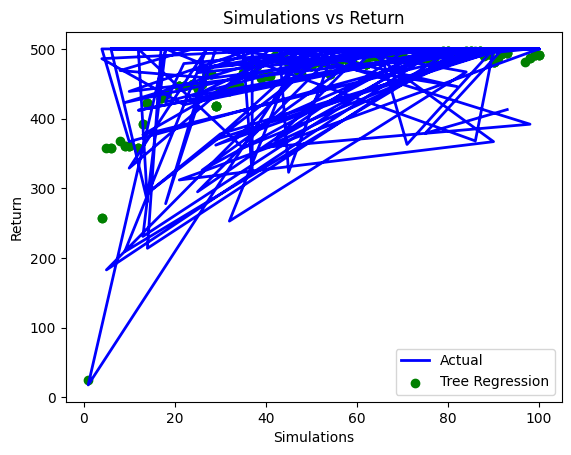

In [36]:
#plt.errorbar(list(range(1, len(group_simulation) + 1)),  mean_returns, yerr=error_returns.array)
plt.plot(X_test, y_test, linewidth=2, color='blue', label='Actual')
plt.plot(X_test, predictions['LinearRegression'], linewidth=2, color='red', label='Linear Regression')
plt.scatter(X_test, predictions['GradientBoostingRegressor'], color='green', label='Tree Regression')
#plt.scatter(X_test, forest_predictions, color='red', label='Forest Regression')


plt.xlabel('Simulations')
plt.ylabel('Return')
plt.title('Simulations vs Return')
plt.legend()
plt.show()

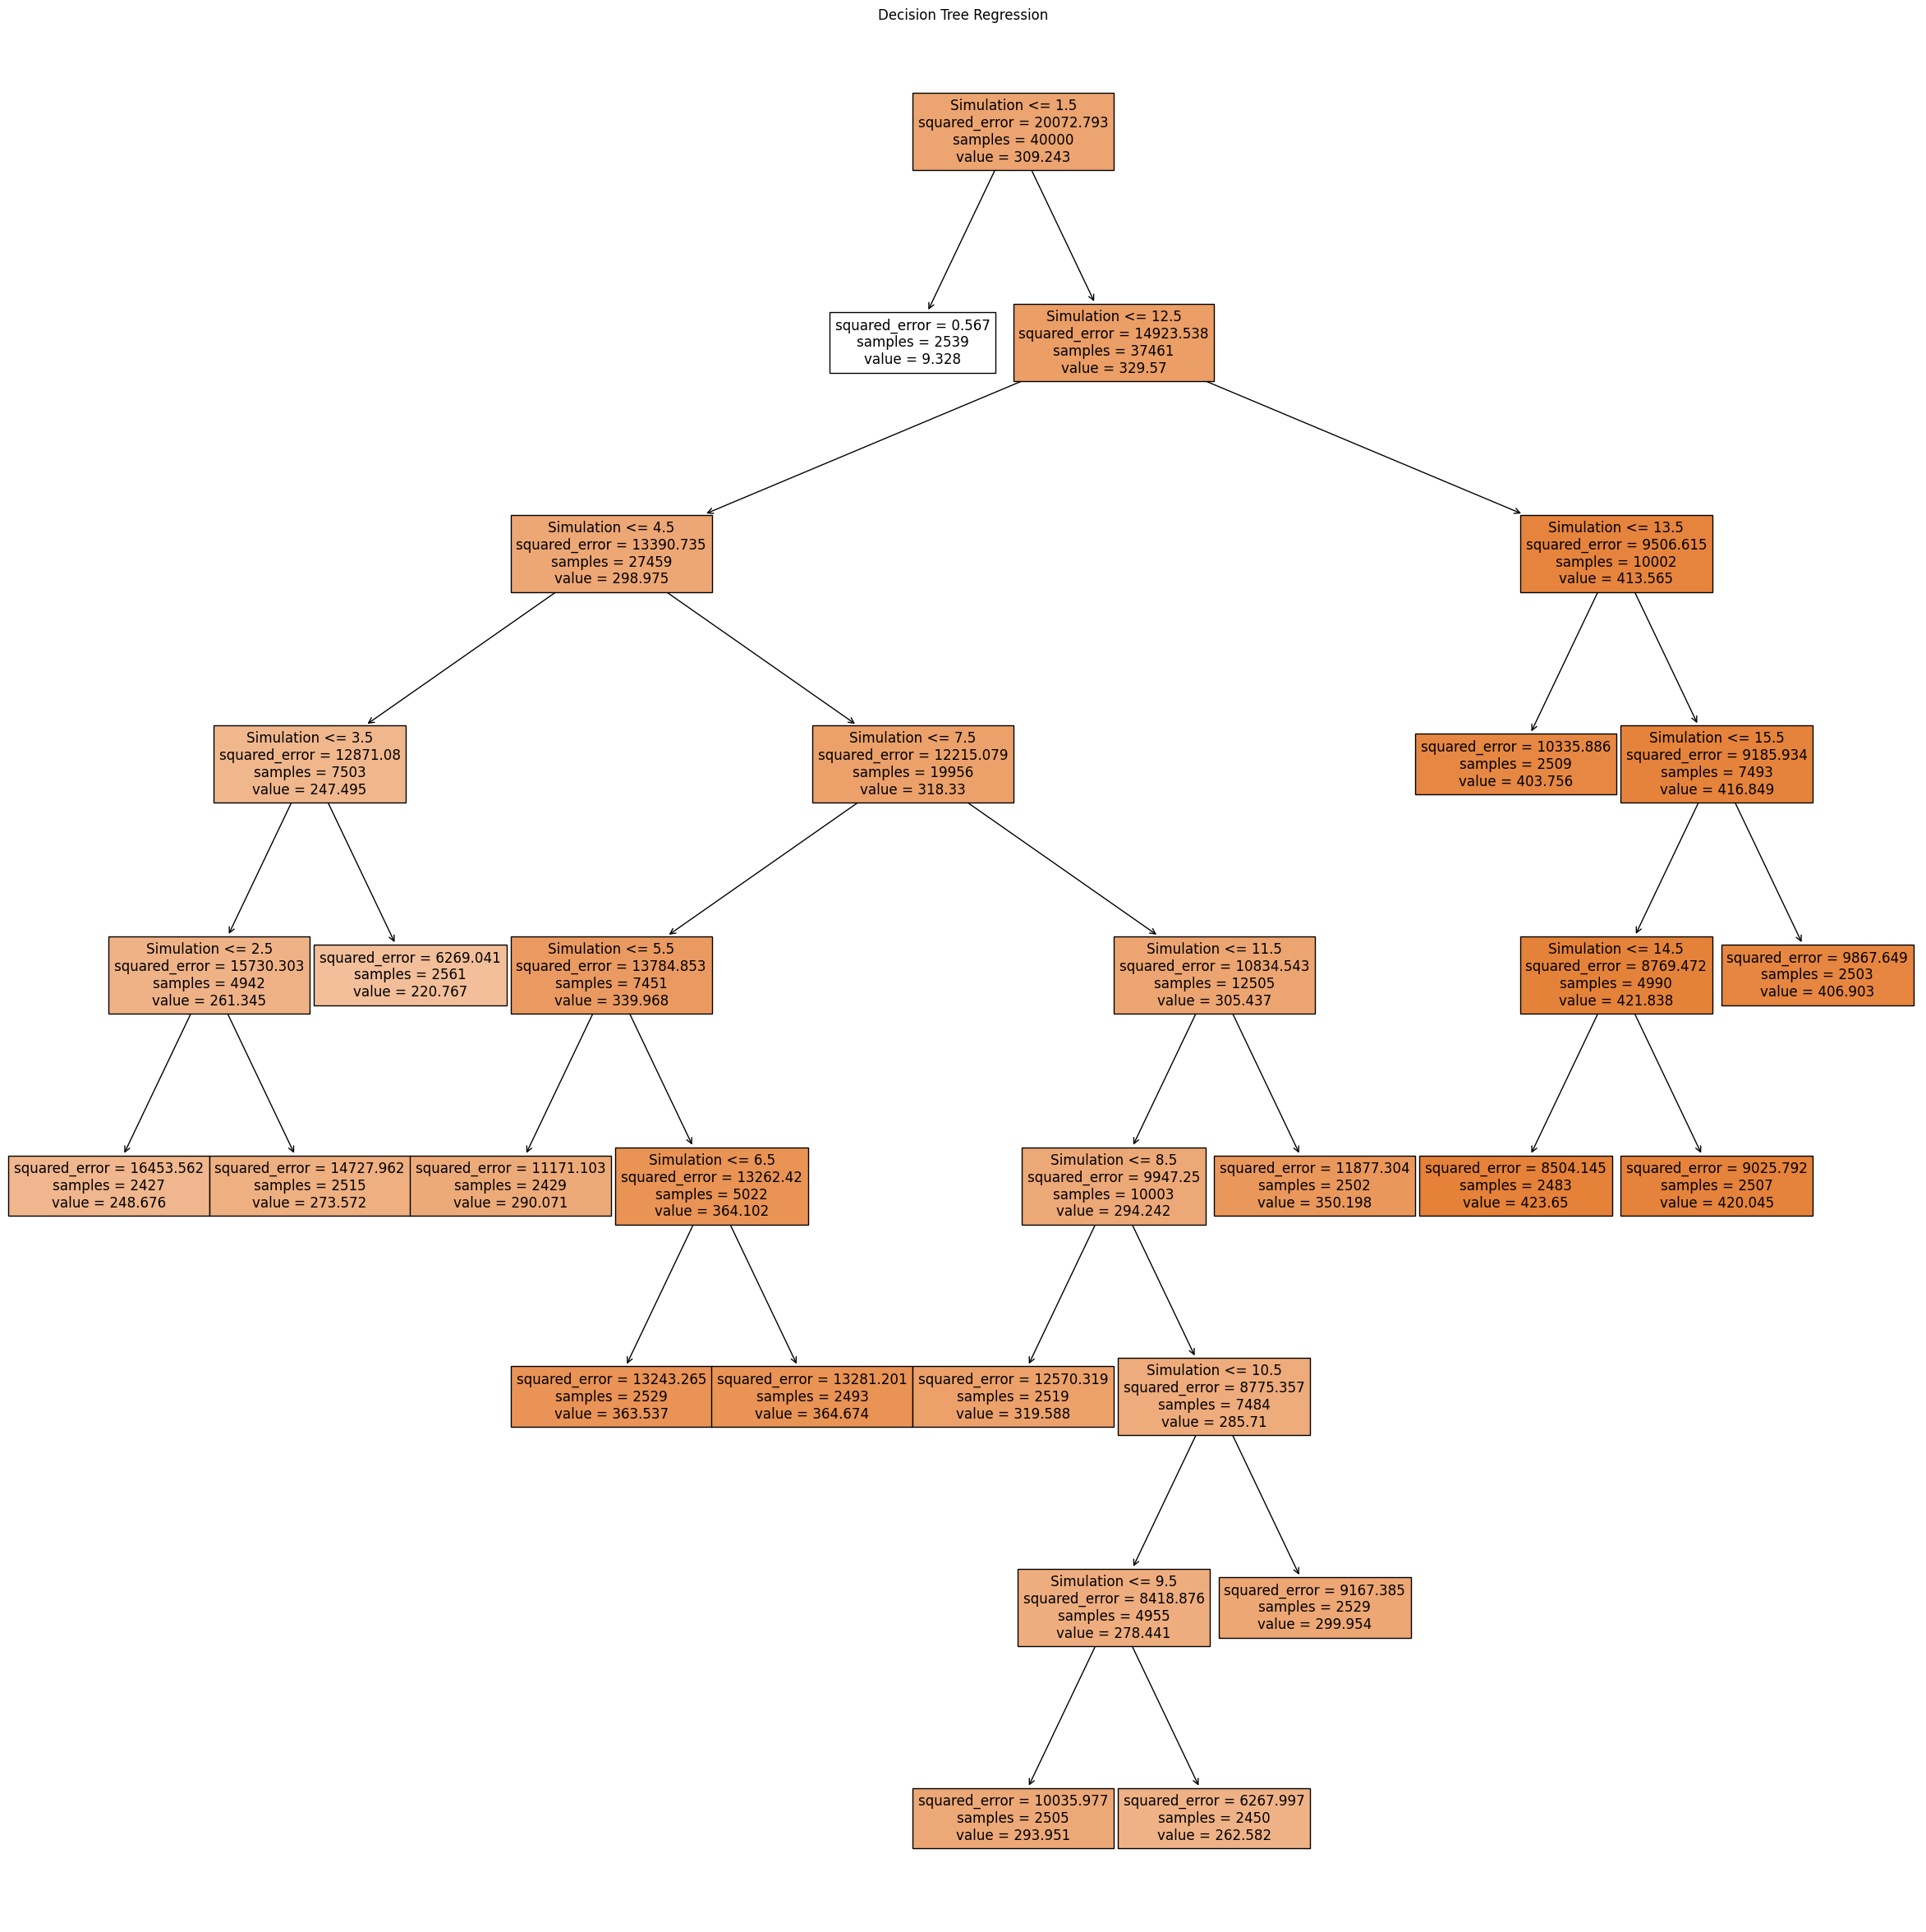

In [134]:
plt.figure(figsize=(30, 30))
plot_tree(tree_model, feature_names=['Simulation'], filled=True)
plt.title('Decision Tree Regression')
plt.show()
